# 11062번 카드 게임  - Gold 3

#### 알고리즘 분류 : 다이나믹 프로그래밍

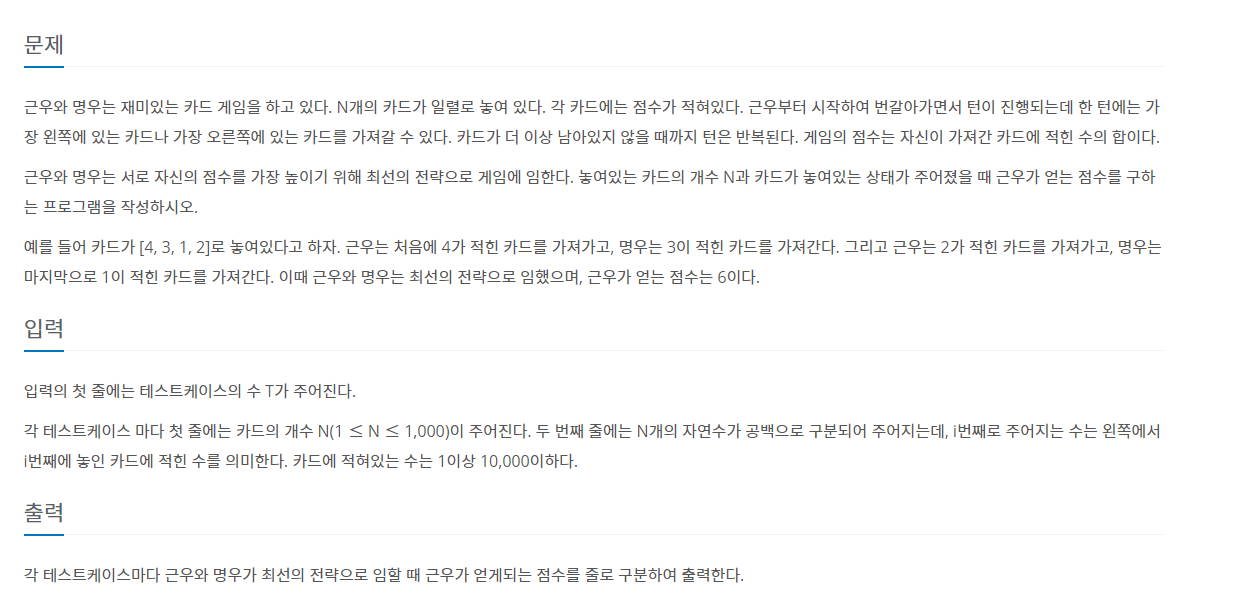

In [ ]:
def pickCard(turn, i, j):
    if i > j: return 0
    if dp[i][j]: return dp[i][j] #이미 계산된 적이 있으면 해당 값 리턴
    
    #근우 차례
    if turn:
        # i카드 + (i+1~j)범위 카드의 명우 순서 or j카드 + (i~j-1)범위 카드의 명우 순서 중 최대 스코어
        score = max(pickCard(False, i+1, j) + cards[i], pickCard(False, i, j-1) + cards[j]) 
        dp[i][j] = score
        return score
        
    #명우 차례
    elif not turn:
        # (i+1~j)범위 카드의 근우 순서 or (i~j-1)범위 카드의 근우 순서 중 최소 스코어
        # 각각 명우가 i, j 카드를 가져갔다고 가정하지만, 근우 입장의 점수를 계산하는 거기 때문에 카드 점수를 더해주지 않음
        score = min(pickCard(True, i+1, j), pickCard(True, i, j-1))
        dp[i][j] = score
        return score

import sys
T = int(input()) #테스트케이스

for _ in range(T):
    N = int(input()) #카드 개수
    cards = list(map(int, sys.stdin.readline().split()))
    dp = [[0 for _ in range(N)] for _ in range(N)] #DP 배열 초기화
    pickCard(True, 0, N-1) #카드가 (0~N-1)범위만큼 있고,  근우 순서일 때 얻는 점수 계산
    print(dp[0][N-1])